Dropdown(description='Node ID:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…

Output()

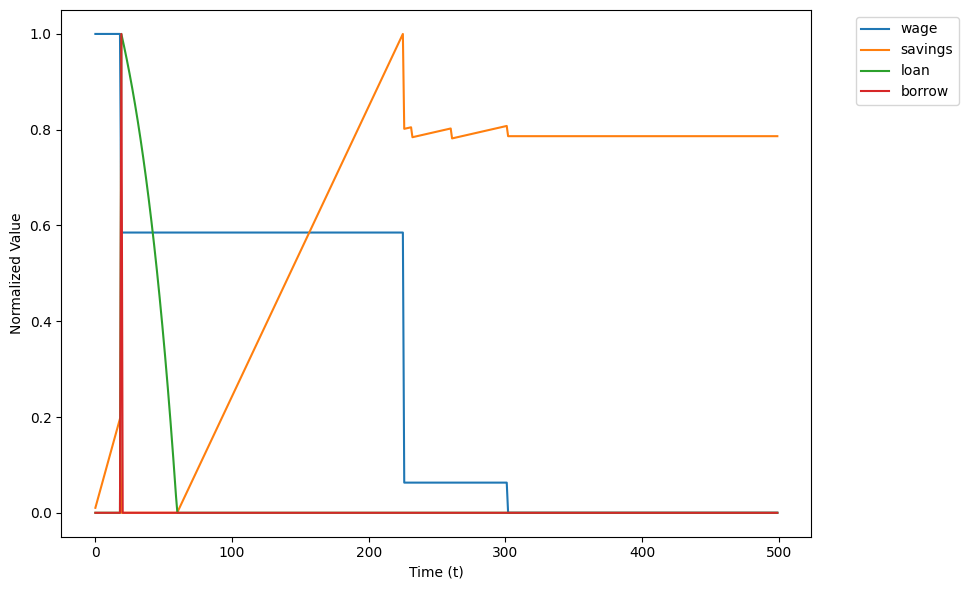

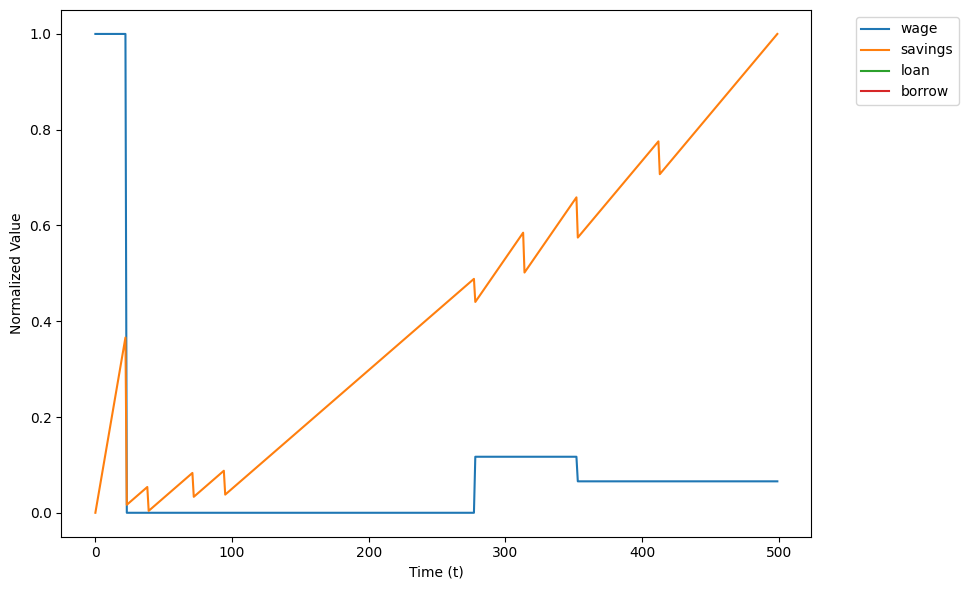

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the CSV file
csv_path = "../code/data/N600t500r20lendingrate3.csv"
df = pd.read_csv(csv_path)

# Pre-filter data by node ID
node_data = {}
for node_id in df["id"].unique():
    node_df = df[df["id"] == node_id].copy()
    node_df.sort_values("t", inplace=True)
    node_data[node_id] = node_df

# Pre-calculate normalized values for each node
normalized_data = {}
candidate_cols = ["wage", "savings", "loan", "borrow"]
for node_id, node_df in node_data.items():
    norm_node_data = {}
    for col in candidate_cols:
        if col in node_df.columns:
            col_data = node_df[col].astype(float)
            cmin, cmax = col_data.min(), col_data.max()
            if cmax - cmin == 0:
                norm_vals = pd.Series(np.zeros_like(col_data), index=col_data.index)
            else:
                norm_vals = (col_data - cmin) / (cmax - cmin)
            norm_node_data[col] = norm_vals
    normalized_data[node_id] = norm_node_data

# Create the figure and axes once
# fig, ax = plt.subplots(figsize=(10, 6)) # REMOVE THIS LINE
# lines = {} # REMOVE THIS LINE
# for col in candidate_cols: # REMOVE THIS LINE
#     line, = ax.plot([], [], label=col) # REMOVE THIS LINE
#     lines[col] = line # REMOVE THIS LINE

# ax.set_xlabel("Time (t)") # REMOVE THIS LINE
# ax.set_ylabel("Normalized Value") # REMOVE THIS LINE
# ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left") # REMOVE THIS LINE
# fig.tight_layout() # REMOVE THIS LINE

# Function to update the plot
previous_figure = None # ADD THIS LINE
def update_plot(node_id):
    global previous_figure # ADD THIS LINE
    with log_area:
        print(f"Updating plot for node ID={node_id}")
    
    if previous_figure: # ADD THIS LINE
        plt.close(previous_figure) # ADD THIS LINE

    fig, ax = plt.subplots(figsize=(10, 6))
    lines = {}
    for col in candidate_cols:
        line, = ax.plot([], [], label=col)
        lines[col] = line

    ax.set_xlabel("Time (t)")
    ax.set_ylabel("Normalized Value")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    fig.tight_layout()

    if node_id in normalized_data:
        norm_node_data = normalized_data[node_id]
        node_df = node_data[node_id]
        for col, line in lines.items():
            if col in norm_node_data:
                if np.all(norm_node_data[col] == 0):
                    with log_area:
                        print(f"  - {col}: all zeros, skipping")
                    line.set_data([], [])
                else:
                    line.set_data(node_df["t"], norm_node_data[col])
                    with log_area:
                        print(f"  - {col}: x={len(node_df['t'])}, y={len(norm_node_data[col])}")
            else:
                line.set_data([], [])
        ax.relim()
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.draw()
        display(fig.canvas)
        previous_figure = fig # ADD THIS LINE
    else:
        with log_area:
            print(f"No data for node ID {node_id}")

# Create the dropdown
unique_ids = sorted(df["id"].unique())
dropdown = widgets.Dropdown(
    options=unique_ids,
    description="Node ID:",
    value=unique_ids[0],
    style={'description_width': 'initial'}
)

# Create the output area
log_area = widgets.Output()

# Callback function
def on_value_change(change):
    with log_area:
        clear_output(wait=True)
        print("Dropdown changed to:", change["new"])
        update_plot(change["new"])

# Attach the callback
dropdown.observe(on_value_change, names="value")

# Display the widgets
display(dropdown)
display(log_area)
# display(fig.canvas) # REMOVE THIS LINE

# Initial plot
update_plot(dropdown.value)